In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

1. Data Preparation:

  Download and explore the Global Superstore Orders dataset.
  Perform basic data cleaning and preprocessing.


2. Data Visualization With Plotly:

  - Create an interactive line chart to show sales trends over the years.
  - Build an interactive map to visualize sales distribution by country.


3. Data Visualization With Plotnine:

  - Use Plotnine to generate a bar chart showing top 10 products by sales.
  - Create a scatter plot to analyze the relationship between profit and discount.


4. Comparative Analysis:

  - Compare the insights gained from Plotly and Plotnine visualizations.
  - Document your observations about the ease of use and effectiveness of both tools.


5. Code And Insights:

  - Write clear, well-documented Python code.
  - Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

In [2]:
!kaggle datasets download -d juhi1994/superstore

Dataset URL: https://www.kaggle.com/datasets/juhi1994/superstore
License(s): unknown
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 104MB/s]


In [3]:
!unzip superstore.zip

Archive:  superstore.zip
  inflating: US Superstore data.xls  


In [30]:
import pandas as pd
import plotnine as pn
import plotly.express as px

df = pd.read_excel('US Superstore data.xls')

# Data exploration
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [19]:
# Create an interactive line chart to show sales trends over the years
sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
pl = px.line(sales)
pl.show()

# Build an interactive map to visualize sales distribution by country
sales_country = df.groupby('Country')['Sales'].sum().reset_index()
sales_map = px.choropleth(sales_country, locations='Country', locationmode='country names',
                        color='Sales', title='Sales Distribution by Country')
sales_map.show()

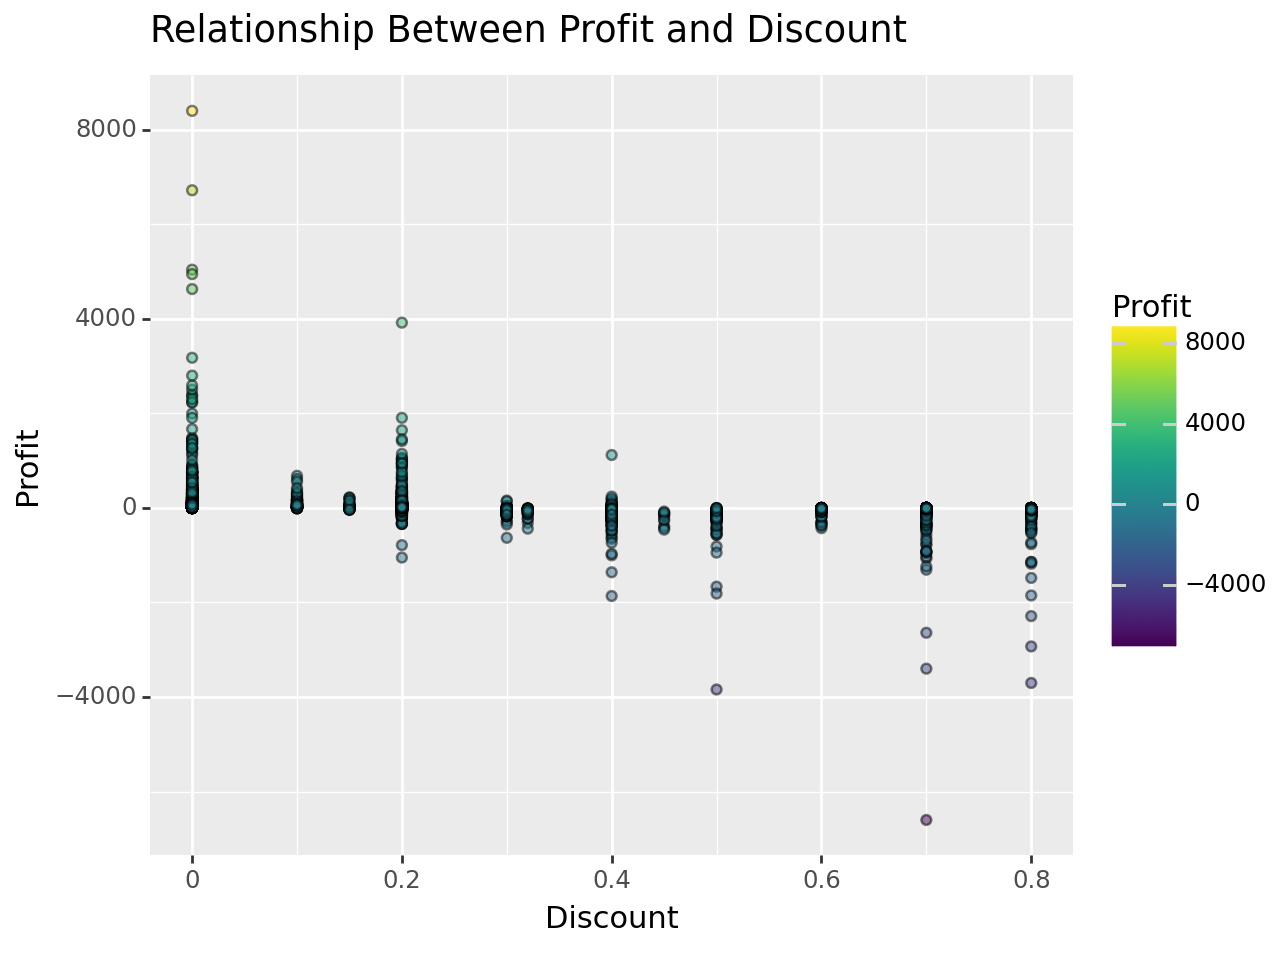

In [28]:
from plotnine import ggplot, aes, geom_bar, geom_point, labs

# Generate a bar chart showing top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
product_bar = (
            ggplot(top_products, aes(x='Product Name', y='Sales', fill='Sales')) +
            geom_bar(stat='identity') +
            labs(title='Top 10 Products by Sales', x='Product Name', y='Sales')
            )
product_bar.draw()

# Create a scatter plot to analyze the relationship between profit and discount
profit_scatter = (
                ggplot(df, aes(x='Discount', y='Profit', fill='Profit')) +
                geom_point(alpha=0.5) +
                labs(title='Relationship Between Profit and Discount', x='Discount', y='Profit')
                )
profit_scatter.draw()

## Comparative Insights

**Plotly:**

Plotly provides a straightforward way to create interactive visualizations with minimal code. The interactivity of Plotly visualizations is highly effective for exploring data in detail.

**Plotnine:**

Plotnine, inspired by ggplot2 in R, offers a grammar of graphics that allows for precise customization. Plotnine is effective for creating publication-quality static plots with extensive customization options.

**Conclusion:**

Plotly is preferred for interactive and exploratory analysis, whereas Plotnine is better suited for creating detailed static plots for reports and publications.